In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#load in csv and drop unused columns
file_path_updated = 'Austin_Animal_Center_Outcomes_Cleaned.csv'
data = pd.read_csv(file_path_updated)
data = data.drop(columns=['Animal ID', 'Name', 'Outcome Type', 'Outcome Subtype', 'MonthYear', 'Date of Birth', 'Age upon Outcome', 'DateTime'])
data.head()

,Animal Type,Sex upon Outcome,Breed,Color,Simplified Outcome,Age in Days
0,Cat,Neutered Male,Domestic Shorthair Mix,Black/White,Adopted,90
1,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,Adopted,730
2,Dog,Neutered Male,Chihuahua Shorthair Mix,White/Brown,Adopted,365
3,Other,Unknown,Raccoon,Gray,Not Adopted,365
4,Dog,Neutered Male,Anatol Shepherd/Labrador Retriever,Buff,Adopted,120


In [131]:
sex_counts = data['Sex upon Outcome'].value_counts()
sex_counts

Sex upon Outcome
Neutered Male    59320
Spayed Female    53755
Intact Male      21781
Intact Female    21326
Unknown          13119
Name: count, dtype: int64

In [132]:
# Drop rows with 'Unknown' or other unspecified values in 'Sex upon Outcome'
data = data[~data['Sex upon Outcome'].str.contains('Unknown', na=False)]
# Grouping fixed animals together and unfixed animals together
fixed_mapping = {
    'Intact Male': 0,
    'Neutered Male': 1,
    'Intact Female': 0,
    'Spayed Female': 1,
}
data['Neutered/Spayed'] = data['Sex upon Outcome'].map(fixed_mapping)

# Grouping females together
sex1_mapping = {
    'Intact Male': 'Male',
    'Neutered Male': 'Male',
    'Intact Female': 'Female',
    'Spayed Female': 'Female',
}
data['Sex'] = data['Sex upon Outcome'].map(sex1_mapping)

data = data.drop(columns=['Sex upon Outcome'])
data.head()

,Animal Type,Breed,Color,Simplified Outcome,Age in Days,Neutered/Spayed,Sex
0,Cat,Domestic Shorthair Mix,Black/White,Adopted,90,1,Male
1,Cat,Domestic Shorthair Mix,Brown Tabby/White,Adopted,730,1,Male
2,Dog,Chihuahua Shorthair Mix,White/Brown,Adopted,365,1,Male
4,Dog,Anatol Shepherd/Labrador Retriever,Buff,Adopted,120,1,Male
5,Cat,Domestic Shorthair Mix,Orange Tabby,Not Adopted,6,0,Male


In [133]:
print("Initial Data Info:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 156182 entries, 0 to 169300
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Animal Type         156182 non-null  object
 1   Breed               156182 non-null  object
 2   Color               156182 non-null  object
 3   Simplified Outcome  156182 non-null  object
 4   Age in Days         156182 non-null  int64 
 5   Neutered/Spayed     156182 non-null  int64 
 6   Sex                 156182 non-null  object
dtypes: int64(2), object(5)
memory usage: 9.5+ MB
Initial Data Info:
 None


In [134]:
# Separate the features from the target.
y = data["Simplified Outcome"]
X = data.drop(columns="Simplified Outcome")

In [135]:
# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le
X.head()

,Animal Type,Breed,Color,Age in Days,Neutered/Spayed,Sex
0,1,1289,63,90,1,1
1,1,1289,185,730,1,1
2,2,927,577,365,1,1
4,2,146,219,120,1,1
5,1,1289,387,6,0,1


In [136]:
# Preview the first five entries for the target variable
y[:5]

0        Adopted
1        Adopted
2        Adopted
4        Adopted
5    Not Adopted
Name: Simplified Outcome, dtype: object

In [137]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [139]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [140]:
 # Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [141]:
 # Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [142]:
# Making predictions using the testing data
yhat = rf_model.predict(X_test)

In [143]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, yhat)
cm_df = pd.DataFrame(
    cm, index=["Actually Not Adopted", "Actually Adopted"], columns=["Predicted Not Adopted", "Predicted Adopted"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, yhat)

In [144]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, yhat))

Confusion Matrix


,Predicted Not Adopted,Predicted Adopted
Actually Not Adopted,19511,1993
Actually Adopted,4003,5730


Accuracy Score : 0.8080481480295804
Classification Report
              precision    recall  f1-score   support

     Adopted       0.83      0.91      0.87     21504
 Not Adopted       0.74      0.59      0.66      9733

    accuracy                           0.81     31237
   macro avg       0.79      0.75      0.76     31237
weighted avg       0.80      0.81      0.80     31237



In [146]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.360753631913628, 'Neutered/Spayed'),
 (0.22826203776451864, 'Age in Days'),
 (0.2101005415705031, 'Breed'),
 (0.16218064430809595, 'Color'),
 (0.03202379245150399, 'Animal Type'),
 (0.006679351991750404, 'Sex')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

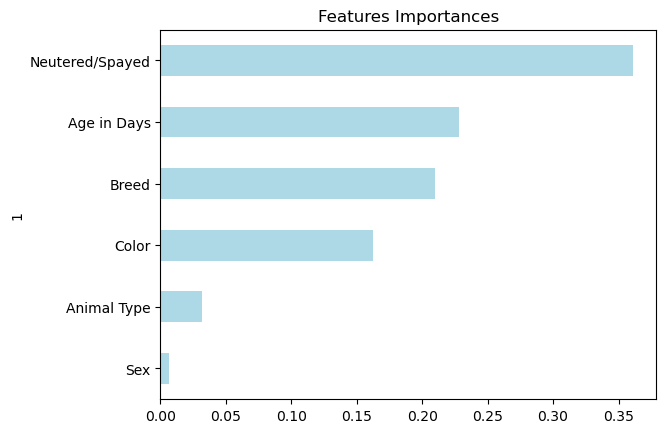

In [147]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightblue', title= 'Features Importances', legend=False)